In [1]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import imdb
from keras import losses
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 1) hidden layer - 1개 

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', ## loss function
              metrics=['accuracy'])

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.5061 - binary_accuracy: 0.7967 - val_loss: 0.3987 - val_binary_accuracy: 0.8701
Epoch 2/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.3283 - binary_accuracy: 0.9002 - val_loss: 0.3456 - val_binary_accuracy: 0.8635
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2544 - binary_accuracy: 0.9225 - val_loss: 0.3052 - val_binary_accuracy: 0.8805
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2102 - binary_accuracy: 0.9343 - val_loss: 0.2869 - val_binary_accuracy: 0.8860
Epoch 5/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1779 - binary_accuracy: 0.9453 - val_loss: 0.2758 - val_binary_accuracy: 0.8917
Epoch 6/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1532 - bin

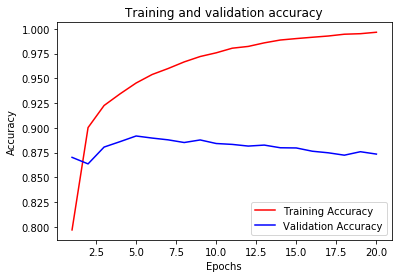

In [11]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 130us/step


[0.49928850970745087, 0.8579199910163879]

### 1) layer - 3개

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.5209 - binary_accuracy: 0.7703 - val_loss: 0.3757 - val_binary_accuracy: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.2889 - binary_accuracy: 0.9061 - val_loss: 0.3077 - val_binary_accuracy: 0.8777
Epoch 3/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2098 - binary_accuracy: 0.9267 - val_loss: 0.2738 - val_binary_accuracy: 0.8918
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1626 - binary_accuracy: 0.9448 - val_loss: 0.3166 - val_binary_accuracy: 0.8756
Epoch 5/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1308 - binary_accuracy: 0.9569 - val_loss: 0.2970 - val_binary_accuracy: 0.8852
Epoch 6/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.0987 - binary_accuracy: 0.9686 - val_loss: 0.3196 - val_bi

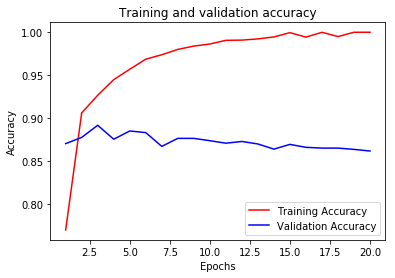

In [16]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 124us/step


[0.8913047682905197, 0.8453599810600281]

### 2) 32 units

In [18]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.4973 - binary_accuracy: 0.7664 - val_loss: 0.3547 - val_binary_accuracy: 0.8603
Epoch 2/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.2725 - binary_accuracy: 0.9000 - val_loss: 0.3244 - val_binary_accuracy: 0.8671
Epoch 3/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1969 - binary_accuracy: 0.9293 - val_loss: 0.2913 - val_binary_accuracy: 0.8866
Epoch 4/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1447 - binary_accuracy: 0.9486 - val_loss: 0.2955 - val_binary_accuracy: 0.8844
Epoch 5/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.1229 - binary_accuracy: 0.9564 - val_loss: 0.3208 - val_binary_accuracy: 0.8816
Epoch 6/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.0864 - binary_accuracy: 0.9727 - val_loss: 0.3400 - val_bi

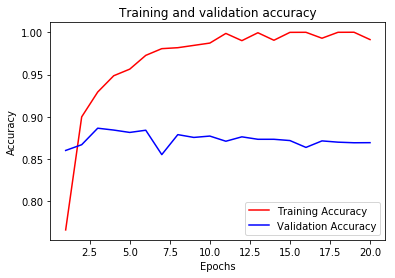

In [21]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 123us/step


[0.9562194170874357, 0.8519999980926514]

### 2) 64 units

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.4951 - binary_accuracy: 0.7567 - val_loss: 0.3114 - val_binary_accuracy: 0.8808
Epoch 2/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.2572 - binary_accuracy: 0.8995 - val_loss: 0.3943 - val_binary_accuracy: 0.8396
Epoch 3/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1847 - binary_accuracy: 0.9295 - val_loss: 0.3623 - val_binary_accuracy: 0.8662
Epoch 4/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.1320 - binary_accuracy: 0.9517 - val_loss: 0.3210 - val_binary_accuracy: 0.8849
Epoch 5/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.0964 - binary_accuracy: 0.9665 - val_loss: 0.4578 - val_binary_accuracy: 0.8511
Epoch 6/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.0837 - binary_accuracy: 0.9721 - val_loss: 0.3741 - val_bi

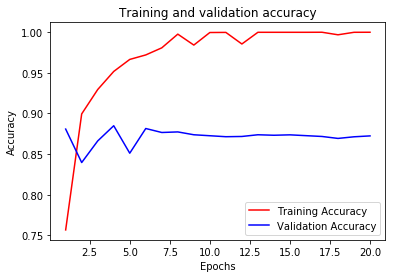

In [26]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 137us/step


[1.2637155660626291, 0.8576800227165222]

### 3) mse loss function

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1673 - binary_accuracy: 0.7759 - val_loss: 0.1119 - val_binary_accuracy: 0.8762
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.0859 - binary_accuracy: 0.9019 - val_loss: 0.0941 - val_binary_accuracy: 0.8789
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.0608 - binary_accuracy: 0.9295 - val_loss: 0.0828 - val_binary_accuracy: 0.8907
Epoch 4/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0443 - binary_accuracy: 0.9509 - val_loss: 0.0835 - val_binary_accuracy: 0.8861
Epoch 5/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0356 - binary_accuracy: 0.9610 - val_loss: 0.1022 - val_binary_accuracy: 0.8612
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0302 - binary_accuracy: 0.9678 - val_loss: 0.1142 - val_bi

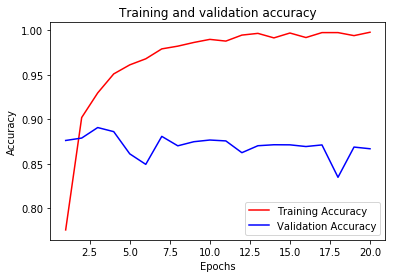

In [31]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 118us/step


[0.1207004007063806, 0.8560000061988831]

### 4) tanh activation

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.0120 - binary_accuracy: 0.9870 - val_loss: 0.1205 - val_binary_accuracy: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0050 - binary_accuracy: 0.9949 - val_loss: 0.1252 - val_binary_accuracy: 0.8645
Epoch 3/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0089 - binary_accuracy: 0.9900 - val_loss: 0.1212 - val_binary_accuracy: 0.8662
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.0045 - binary_accuracy: 0.9955 - val_loss: 0.1228 - val_binary_accuracy: 0.8659
Epoch 5/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.0083 - binary_accuracy: 0.9909 - val_loss: 0.1252 - val_binary_accuracy: 0.8627
Epoch 6/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.0040 - binary_accuracy: 0.9961 - val_loss: 0.1236 - val_bi

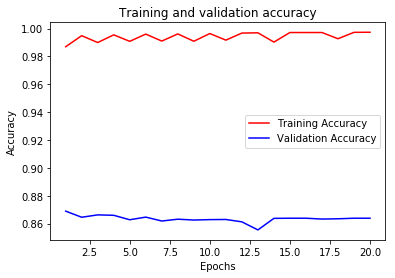

In [39]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [40]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 123us/step


[0.14337796947576106, 0.84579998254776]